# 梯度下降教程
# Gradient Descent Tutorial
作者：Wanying 
日期: 2025年1月

## 1. 什么是梯度下降？
### 1. What is Gradient Descent?

梯度下降是一种用于优化和寻找函数最小值的方法。
Gradient Descent is a method used to optimize and find the minimum of a function.

### 梯度下降的步骤:
1. **定义损失函数 $J(\theta)$**: 它是我们要最小化的目标。
2. **初始化点 $\theta_0$**: 随机选择一个起点。
3. **计算梯度 $\nabla J(\theta)$**: 确定当前点下降最快的方向。
4. **更新参数**: $\theta_{t+1} = \theta_t - \eta \nabla J(\theta)$，其中 $\eta$ 是学习率。
5. **重复迭代**: 直到满足收敛条件。

### Steps of Gradient Descent:
1. **Define the loss function $J(\theta)$**: This is the function we aim to minimize.
2. **Initialize a point $\theta_0$**: Start at a random point.
3. **Calculate the gradient $\nabla J(\theta)$**: Find the direction of steepest descent.
4. **Update the parameter**: $\theta_{t+1} = \theta_t - \eta \nabla J(\theta)$, where $\eta$ is the learning rate.
5. **Repeat iteration**: Until the convergence condition is met.

## 2. 梯度下降实现: 一元函数
### 2. Implementation of Gradient Descent: Single-variable function

我们定义一个简单的函数 $J(\theta) = (\theta - 2)^2 - 1$，目标是找到其最小值。
We define a simple function $J(\theta) = (\theta - 2)^2 - 1$, and the goal is to find its minimum.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义损失函数和梯度
# Define the loss function and gradient
def J(theta):
    return (theta - 2)**2 -1
def dJ(theta):
    return 2 * (theta - 2)

# 梯度下降算法
# Gradient Descent Algorithm
def gradient_descent(initial_theta, eta, n_iters=1000, epsilon = 1e-8):
    theta = initial_theta
    theta_history = [theta]
    for _ in range(n_iters):
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if abs(J(theta) - J(last_theta)) < epsilon:
            break
    return theta, theta_history

# 初始化参数
# Initialize parameters
initial_theta = -4
eta = 0.1
theta, theta_history = gradient_descent(initial_theta, eta)

print(f"函数在 x={theta} 处取得最小值！")
print(f"The function reaches its minimum at x={theta}.")
print(f"函数的最小值为：{J(theta)}")
print(f"The minimum value of the function is {J(theta)}.")

函数在 x=1.999892956423047 处取得最小值！
The function reaches its minimum at x=1.999892956423047.
函数的最小值为：-0.9999999885416726
The minimum value of the function is -0.9999999885416726.


### 可视化梯度下降过程
### Visualizing the Gradient Descent Process

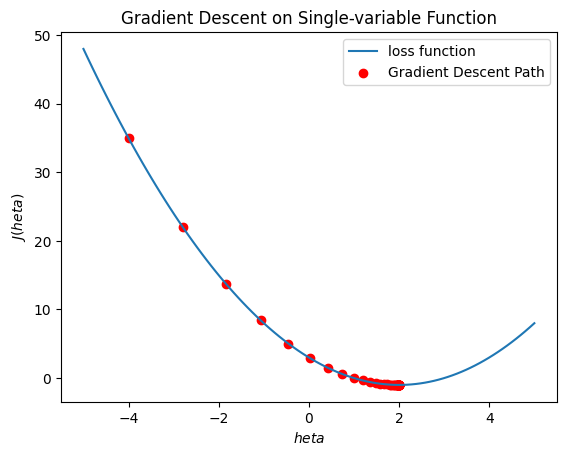

In [13]:
# 绘制函数曲线和梯度下降路径
# Plot the function curve and gradient descent path
plot_x = np.linspace(-5, 5, 100)
plot_y = J(plot_x)

plt.plot(plot_x,plot_y,label = "loss function")
plt.scatter(theta_history,[J(t) for t in theta_history], color = "red", label = "Gradient Descent Path")

plt.title("Gradient Descent on Single-variable Function")
plt.xlabel("$\theta$")
plt.ylabel("$J(\theta)$")
plt.legend()
plt.show()

## 3. 梯度下降实现: 二元函数
### 3. Implementation of Gradient Descent: Two-variable function

我们定义一个二元函数 $J(\theta_1, \theta_2) = (\theta_1 - 4)^2 + (\theta_2 - 5)^2$，目标是找到其最小值。
We define a two-variable function $J(\theta_1, \theta_2) = (\theta_1 - 4)^2 + (\theta_2 - 5)^2$, and the goal is to find its minimum.

In [14]:
# 定义损失函数和梯度
# Define the loss function and gradient
def J_2(theta):
    return (theta[0] - 4)**2 + (theta[1] - 5)**2

def dJ_2(theta):
    return np.array([2 * (theta[0] - 4), 2 * (theta[1] - 5)])

# 梯度下降算法
# Gradient Descent Algorithm
def gradient_descent_2(initial_theta, eta, n_iters=1000, epsilon=1e-8):
    theta = np.array(initial_theta)
    theta_history = [theta]
    for _ in range(n_iters):
        gradient = dJ_2(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if abs(J_2(theta) - J_2(last_theta)) < epsilon:
            break
    return theta, theta_history

# 初始化参数
# Initialize parameters
initial_theta = [0.0, 0.0]
eta = 0.1
theta, theta_history = gradient_descent_2(initial_theta, eta)

print(f"函数在 θ={theta} 处取得最小值！")
print(f"The function reaches its minimum at θ={theta}.")
print(f"函数的最小值为：{J_2(theta)}")
print(f"The minimum value of the function is {J_2(theta)}.")

函数在 θ=[3.99992864 4.9999108 ] 处取得最小值！
The function reaches its minimum at θ=[3.99992864 4.9999108 ].
函数的最小值为：1.3049761723369587e-08
The minimum value of the function is 1.3049761723369587e-08.


### 可视化二元函数的梯度下降过程 (3D)
### Visualizing the Gradient Descent Process for Two-variable Function (3D)

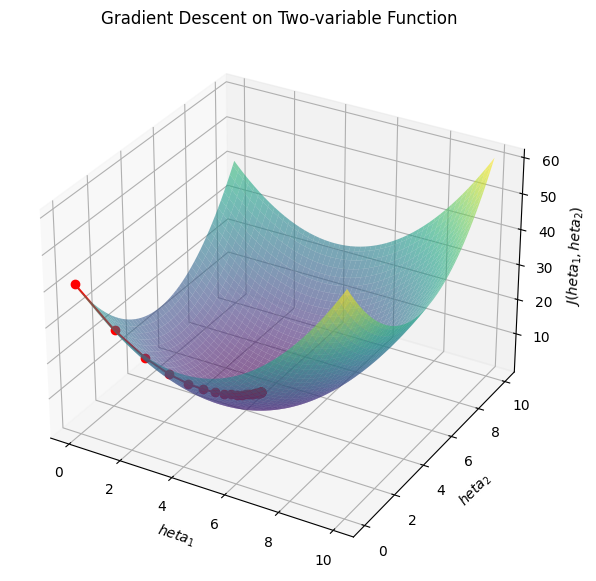

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# 绘制三维曲面
# Plot the 3D surface
plot_x = np.linspace(0, 10, 100)
plot_y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(plot_x, plot_y)
Z = (X - 4)**2 + (Y - 5)**2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.6)

# 绘制梯度下降路径
# Plot the gradient descent path
theta_history = np.array(theta_history)
ax.plot(theta_history[:, 0], theta_history[:, 1], J_2(theta_history.T), color="red", marker="o")
ax.set_title("Gradient Descent on Two-variable Function")
ax.set_xlabel("$\theta_1$")
ax.set_ylabel("$\theta_2$")
ax.set_zlabel("$J(\theta_1, \theta_2)$")
plt.show()